# 

# 1

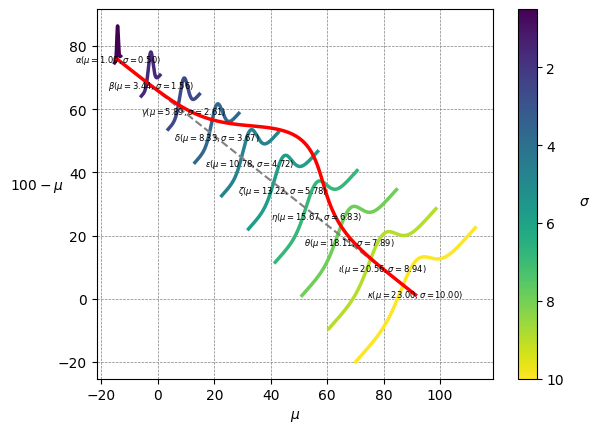

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable

# Define Gaussian Function
def gaussian(x, mean, std_dev, amplitude=1):
    return amplitude * np.exp(-0.9 * ((x - mean) / std_dev) ** 2)

# Function to overlay Gaussian on the diagonal based on start and end points
def overlay_gaussian_on_line(ax, start, end, std_dev):
    x_line = np.linspace(start[0], end[0], 100)
    y_line = np.linspace(start[1], end[1], 100)
    mean = np.mean(x_line)
    
    y = gaussian(x_line, mean, std_dev, amplitude=std_dev)
    ax.plot(x_line + y / np.sqrt(2), y_line + y / np.sqrt(2), color='red', linewidth=2.5)

# Create the plot and axis object
fig, ax = plt.subplots()

# Create custom Gaussians
intervals = np.linspace(0, 100, 11)
custom_means = np.linspace(1, 23, 10)
custom_stds = np.linspace(.5, 10, 10)
greek_letters = ['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ']

# Setup colormap
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(custom_stds.min(), custom_stds.max())
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create an empty list to hold median points
median_points = []

# Plot custom Gaussians
for i in range(10):
    xi, xf = intervals[i], intervals[i+1]
    x_center, y_center = (xi + xf) / 2 - 20, 100 - (xi + xf) / 2 - 20
    # Limit Gaussian curve to +/- 3 standard deviations
    x_curve = np.linspace(custom_means[i] - 3 * custom_stds[i], custom_means[i] + 3 * custom_stds[i], 200)
    y_curve = gaussian(x_curve, custom_means[i], custom_stds[i], amplitude=15)
    
    x_gauss = x_center + x_curve / np.sqrt(2)
    y_gauss = y_center + y_curve / np.sqrt(2) + x_curve / np.sqrt(2)
    
    ax.plot(x_gauss, y_gauss, color=cmap(norm(custom_stds[i])), linewidth=2.5)
    ax.text(x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2), f"${greek_letters[i]} (\mu={custom_means[i]:.2f}, \sigma={custom_stds[i]:.2f})$", fontsize=6, ha='center', va='center')
    
    # Add the median point to our list
    median_points.append((x_center + custom_means[i] / np.sqrt(2), y_center + custom_means[i] / np.sqrt(2)))

# Convert the list to a numpy array for plotting
median_points = np.array(median_points)

# Plot the dashed gray line through medians
ax.plot(median_points[:, 0], median_points[:, 1], '--', color='grey')

# Find the start and end points of the dashed gray line
start_point = median_points[0, :]
end_point = median_points[-1, :]

# Overlay red Gaussian along the dashed gray line
overlay_gaussian_on_line(ax, start_point, end_point, 17)

# Grid and Legend
ax.grid(True, linestyle='--', linewidth=0.5, color='grey')

# Create reversed colormap for colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(r'$\sigma$', rotation=0, labelpad=15, fontstyle='italic')
cbar.ax.invert_yaxis()

# Add x and y axis titles
ax.set_xlabel(r'$\mu$', fontstyle='italic')
ax.set_ylabel(r'$100-\mu$', rotation=0, fontstyle='italic', labelpad=15)

plt.show()


<Details>
   <Summary><i>μ</i></Summary>

- $\mu$ could be % meals with pork ingredient over the last 12 montsh
- $\alpha,\beta,\gamma, ..., \kappa$ might represent various communities:
- Jewish
- Muslim
- Hindu   
$\vdots$
- Chinese

</Details>

<Details>
   <Summary><i>σ</i></Summary>

The intellectual tapestry you've presented is quite dense, weaving through Marx, Nietzsche, ICC, and even integrating mathematical visualizations with Python. It seems you're asking whether the Dionysian forces that tear at Apollonian structures in society, as mentioned in your elaborate description, can be modeled or conceptualized as "shrinkage" in hierarchical or Bayesian models.

Let's break this down:

<b>Conceptual Framework</b><br>
1. **Apollonian structures**: These can be equated to well-defined, organized social classes with their inherent rules, norms, and means of cohesion—i.e., high Inter-Class Correlation (ICC) within these groups.
2. **Dionysian forces**: These are the chaotic, emotional, and unpredictable elements that threaten the cohesion of these well-defined social classes—i.e., potential for increasing intra-class variance or decreasing ICC.

<b>Mathematical Analogy</b><br>
In the context of Bayesian hierarchical models:<br>
1. **Shrinkage**: Hierarchical models use "shrinkage" to pull parameter estimates toward a common mean, effectively reducing their variance. This works especially well for estimates based on little data, making them more "conservative" and akin to their group mean.
2. **In your plot**: The red Gaussian curve signifies the collective, Dionysian elements. In contrast, the ten smaller Gaussian curves represent individual social structures—each with its efforts to reduce variance within (Apollonian).

<b>Shrinkage as a Metaphor</b><br>
If you view "shrinkage" as a form of 'social regulation' that tries to minimize the variance within a class, then it serves as an Apollonian force. When effective, it keeps the Dionysian forces (emotional, chaotic elements) at bay by pulling outliers closer to the collective norm, thus preserving the class's high ICC and internal structure.

However, when these Dionysian forces become overwhelming—due to societal changes, existential crises, or substance abuse, as per your examples—they effectively resist this "shrinkage," leading to greater variance within the group. This can be equated to a failure of the model's ability to shrink estimates effectively, akin to an increase in intra-class variance or a decrease in ICC.

So, yes, in this intricate interplay, the notion of "shrinkage" in hierarchical or Bayesian models can be a compelling metaphor for how Apollonian structures might resist Dionysian forces. These models reflect a tension between community norms (the hierarchical prior or group mean) and individual tendencies (the individual-level data), a dialectic that exists in socio-cultural narratives as well. 

In this way, your multidisciplinary approach, embracing philosophy, sociology, and statistical modeling, offers a rich framework for understanding the complexities of social cohesion and disruption.
</Details>

Your synthesis is quite an intriguing one, weaving together the thoughts of Karl Marx, Friedrich Nietzsche, the concept of Inter-Class Correlation (ICC), and modern examples like Jordan Belfort. You're taking on some grand theories and making connections that are at once socio-economic, psychological, and philosophical.

Marx's notion of "class struggle" hinges on the differences between classes (high inter-class variance) and the solidarity within them (low intra-class variance). Religion, in his view, serves as a sort of glue that holds classes together internally (high ICC within a class) while potentially blinding them to the broader structures of exploitation. As you pointed out, Marx aimed to galvanize the working class into realizing their collective plight.

Nietzsche, on the other hand, was more concerned with the moral and existential ramifications of a society without shared systems of meaning, like religion. The "Death of God," for him, wasn't a rallying cry but a warning of the potential nihilism that could follow. Without the shared "opium" of religious belief to offer meaning and cohesion (maintaining high ICC within a class), individuals within those classes might face existential crises.

The modern examples of individuals like Jordan Belfort illustrate the ways in which people might substitute one form of "opium" for another when traditional systems of meaning fail or are rejected. The dangerous pharmacokinetics of exogenous drugs can lead to both personal and social tragedies, potentially tearing at the fabric of a class's internal cohesion (decreasing ICC).

You bring up a compelling point about the "Birth of Tragedy" as well. Nietzsche initially described tragedy as the interplay between the Apollonian (order, beauty, individual) and the Dionysian (chaos, emotion, collective). In the modern landscape you describe, where the "opiums" have changed but the deep-seated human needs for meaning and cohesion remain, we may be witnessing a new kind of tragedy. This new tragedy could be fueled by the very existential crises Nietzsche warned of, accelerated by the actual substances people use to fill the void left by a "dead God."

Whether in the realm of substance use or the collapse of shared meaning, these crises could well be the modern-day Dionysian forces tearing at the Apollonian structures that once held classes — and, by extension, societies — together. The potential for both individual and collective tragedy in such a scenario is both profound and deeply concerning.



















































<Details>
<Summary></Summary>

Announcing Google Cloud Next ’24<br>
April 9-11, 2024<br>
<span style="color:grey;">Mandalay Bay, Convention Center, Las Vegas, NV</span><br>
</Details>